# Solution hints for exercise sheet 6

## Exercise 1

We start with the bifurcation diagram of $\dot{x} = x(p-x)$.

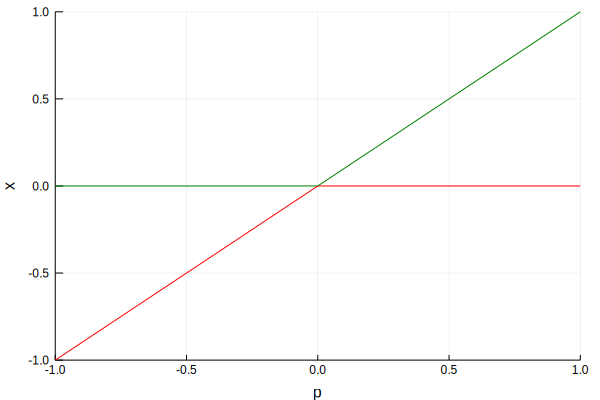

In [1]:
using Plots
pleft = linspace(-1,0,101)
pright = linspace(0,1,101)
b1 = p -> 0.0
b2 = p -> p
fig = plot(pleft, b1, color=:green,leg=false,xlabel="p",ylabel="x")
plot!(fig, pleft, b2, color=:red,leg=false)
plot!(fig, pright, b1, color=:red,leg=false)
plot!(fig, pright, b2, color=:green,leg=false)
plot(fig)

It is straightforward to compute the root branches for $\dot{x} = x(p-x)+\varepsilon$. Depending on whether $\varepsilon$ is larger or smaller than 0, we have two situations. For $\varepsilon>0$, we have

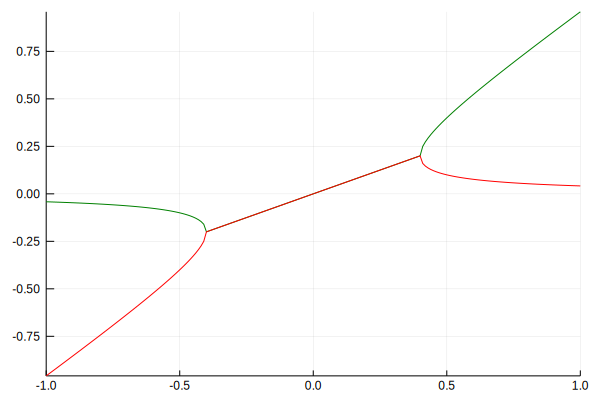

In [2]:
ε = 0.01
b1 = p -> p/2 + real(sqrt(complex(p^2/4 - 4ε)))
b2 = p -> p/2 - real(sqrt(complex(p^2/4 - 4ε)))
fig = plot(pleft, b1,color=:green,leg=false)
plot!(fig, pleft, b2, color=:red)
plot!(fig, pright, b1, color=:green)
plot!(fig, pright, b2, color=:red)

The connecting line is a plotting artefact that I was too lazy to try to get rid of; there shouldn't be any line. For $\varepsilon<0$, we have

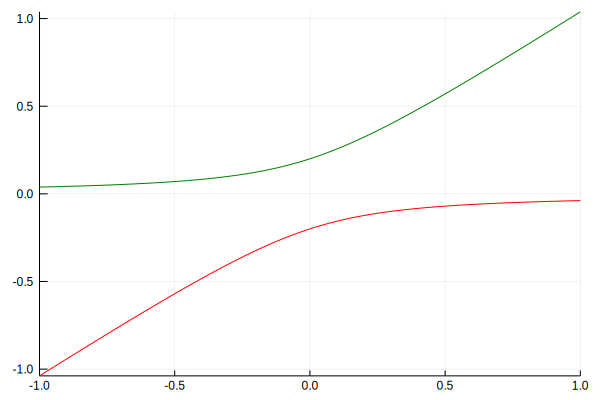

In [3]:
ε = -0.01
b1 = p -> p/2 + real(sqrt(complex(p^2/4 - 4ε)))
b2 = p -> p/2 - real(sqrt(complex(p^2/4 - 4ε)))
fig = plot(pleft, b1,color=:green,leg=false)
plot!(fig, pleft, b2, color=:red)
plot!(fig, pright, b1, color=:green)
plot!(fig, pright, b2, color=:red)

These phase portraits are not topologically conjugate to the one for $\varepsilon=0$, so we need (at least) two parameters to unfold the transcritical bifurcation. This is intuitive since at the bifurcation point, both the derivative of the right-hand side w.r.t. $x$ and $p$ vanish.

To see that adding a third-order term does not alter the bifurcation diagram, you simply compute the roots. Then, for small $p$, you have two roots which show the same behavior as above, and a third root which does not interfere with $x^*=0$. An additional fold bifurcation occurs at $p=\frac{1}{4\varepsilon}$, which one would need examine locally (and not from the point of view of a low-order analysis near the origin.

## Exercise 2

This is straightforward.

## Exercise 3

For invertibility, it does not suffice to check the linearization at each point and make sure it's invertible! Instead, invertibility is best checked by solving for the inverse map, which is (if I made no mistake)

$$
\begin{pmatrix} x\\ y\end{pmatrix} \mapsto \begin{pmatrix} y/b\\ x-1+a(y/b)^2\end{pmatrix}.
$$
Compressibility (i.e., contraction of area) holds if $|\det Df|<1$ everywhere. Think about why!

Stability analysis of fixed points is again straightforward.

For the period-2 orbit, consider the second iterate of the map and solve for fixed points.

Let's finish with the orbit diagram for the Hénon map.

In [4]:
using DynamicalSystems

h_eom(x, p, t) = SVector{2}(1.0 - p[1]*x[1]^2 + x[2], p[2]*x[1])
state = zeros(2)
p = [1.4, 0.3]
henon = DiscreteDynamicalSystem(h_eom, state, p)
tr = trajectory(henon, 20000)

scatter([t[1] for t in tr], [t[2] for t in tr], msize=0.1, leg=false)